# Basic case

This is the basic tutorial for training the CNN (Moroney, 2021).

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /tmp/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2024-11-02 01:04:11--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.207, 173.194.206.207, 74.125.126.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   160MB/s    in 1.2s    

2024-11-02 01:04:12 (160 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2024-11-02 01:04:12--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.207, 173.194.206.207, 74.125.126.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps

In [3]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock05ck01-082.png', 'rock03-019.png', 'rock07-k03-045.png', 'rock05ck01-073.png', 'rock05ck01-009.png', 'rock02-080.png', 'rock01-064.png', 'rock01-076.png', 'rock06ck02-011.png', 'rock06ck02-112.png']
['paper07-054.png', 'paper07-001.png', 'paper02-063.png', 'paper07-056.png', 'paper06-092.png', 'paper06-078.png', 'paper04-006.png', 'paper06-091.png', 'paper04-052.png', 'paper04-022.png']
['scissors02-082.png', 'scissors04-097.png', 'scissors01-106.png', 'scissors03-088.png', 'testscissors01-048.png', 'scissors03-046.png', 'testscissors03-118.png', 'testscissors01-118.png', 'scissors02-095.png', 'testscissors03-005.png']


In [6]:
import tensorflow as tf
!pip install keras_preprocessing
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


"model = tf.keras.models.Sequential([\n    # Note the input shape is the desired size of the image 150x150 with 3 bytes color\n    # This is the first convolution\n    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),\n    tf.keras.layers.MaxPooling2D(2, 2),\n    # The second convolution\n    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    # The third convolution\n    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    # The fourth convolution\n    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2,2),\n    # Flatten the results to feed into a DNN\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dropout(0.5),\n    # 512 neuron hidden layer\n    tf.keras.layers.Dense(512, activation='relu'),\n    tf.keras.layers.Dense(3, activation='softmax')\n])\n\n\nmodel.summary()\n\nmodel.compile(loss = 'categorical_crossentropy

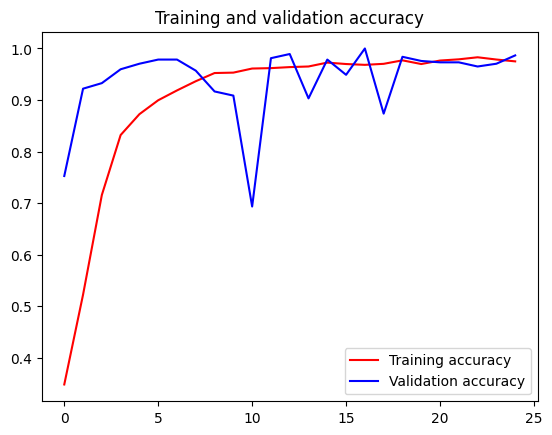

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Reducing the number of epochs

Here, I am establishing a base case with only 10 epochs in order to more easily test other conditions.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 346ms/step - accuracy: 0.3847 - loss: 1.1918 - val_accuracy: 0.7500 - val_loss: 0.8739
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 302ms/step - accuracy: 0.5805 - loss: 0.9581 - val_accuracy: 0.8629 - val_loss: 0.3992
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 254ms/step - accuracy: 0.7354 - loss: 0.6399 - val_accuracy: 0.9516 - val_loss: 0.2665
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 253ms/step - accuracy: 0.8463 - loss: 0.4218 - val_accuracy: 0.9543 - val_loss: 0.1272
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 260ms/step - accuracy: 0.8754 - loss: 0.3278 - val_accuracy: 0.8683 - val_loss: 0.2401
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 263ms/step - accuracy: 0.9085 - loss: 0.2368 - val_accuracy: 1.0000 - val_loss: 0.0167
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 250ms/step - accuracy: 0.9288 - loss: 0.2222 - val_accuracy: 0.9892 - val_loss: 0.0622
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 268ms/step - accuracy: 0.9406 - loss: 0.1706 - val_accu

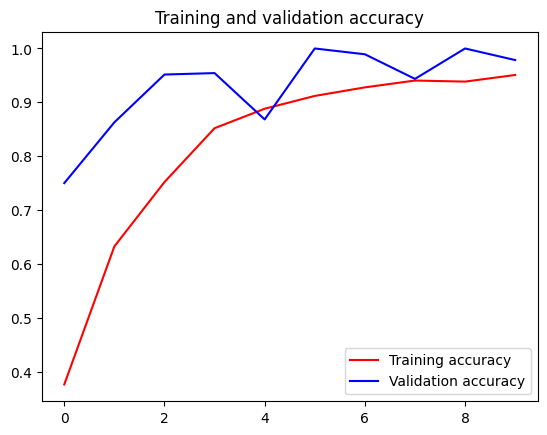

<Figure size 640x480 with 0 Axes>

In [10]:
model1 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model1.summary()

model1.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model1.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Changing the number of convolutions

## One convolution

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_91 (Conv2D)                   │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_86 (MaxPooling2D)      │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 350464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 350464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │     179,438,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,441,411 (684.51 MB)

 Trainable params: 179,441,411 (684.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 259ms/step - accuracy: 0.9644 - loss: 0.1125 - val_accuracy: 1.0000 - val_loss: 0.0155
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 250ms/step - accuracy: 0.9719 - loss: 0.0890 - val_accuracy: 0.9839 - val_loss: 0.0252
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 257ms/step - accuracy: 0.9786 - loss: 0.0662 - val_accuracy: 0.9839 - val_loss: 0.0273
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 282ms/step - accuracy: 0.9694 - loss: 0.1021 - val_accuracy: 0.9355 - val_loss: 0.1249
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.9773 - loss: 0.0920 - val_accuracy: 0.9946 - val_loss: 0.0145
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 263ms/step - accuracy: 0.9809 - loss: 0.0545 - val_accuracy: 0.9489 - val_loss: 0.1223
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 269ms/step - accuracy: 0.9829 - loss: 0.0533 - val_accuracy: 0.9731 - val_loss: 0.0456
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 251ms/step - accuracy: 0.9767 - loss: 0.0861 - val_accu

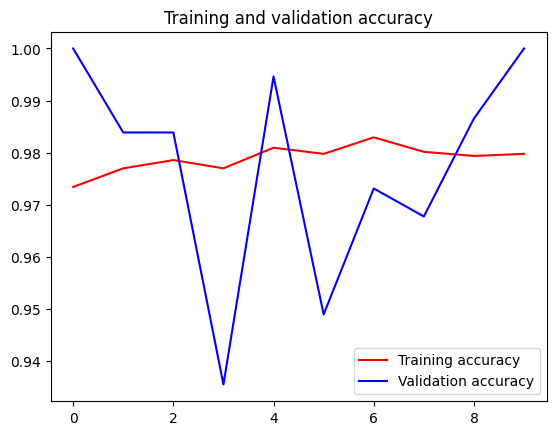

<Figure size 640x480 with 0 Axes>

In [25]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
model3.add(tf.keras.layers.MaxPooling2D(2, 2))
# Flatten the results to feed into a DNN
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dropout(0.5))
# 512 neuron hidden layer
model3.add(tf.keras.layers.Dense(512, activation='relu'))
model3.add(tf.keras.layers.Dense(3, activation='softmax'))
model3.summary()

model3.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model1.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

This performed incredibly well compared to the other variations on convolution number, and has the largest number of trainable parameters.

## 2 convolutions

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_98 (Conv2D)                   │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_91 (MaxPooling2D)      │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_99 (Conv2D)                   │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_92 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 512)                 │      42,467,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,508,099 (162.16 MB)

 Trainable params: 42,508,099 (162.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 295ms/step - accuracy: 0.3396 - loss: 3.0949 - val_accuracy: 0.3575 - val_loss: 1.0854
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 246ms/step - accuracy: 0.4242 - loss: 1.1114 - val_accuracy: 0.7930 - val_loss: 0.7163
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 266ms/step - accuracy: 0.6105 - loss: 0.8399 - val_accuracy: 0.6478 - val_loss: 0.6286
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 250ms/step - accuracy: 0.7113 - loss: 0.6932 - val_accuracy: 0.8978 - val_loss: 0.3353
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 260ms/step - accuracy: 0.7515 - loss: 0.5975 - val_accuracy: 0.9489 - val_loss: 0.2830
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 266ms/step - accuracy: 0.7995 - loss: 0.5016 - val_accuracy: 0.7204 - val_loss: 0.4950
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 273ms/step - accuracy: 0.8254 - loss: 0.4579 - val_accuracy: 0.9086 - val_loss: 0.2325
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 252ms/step - accuracy: 0.8660 - loss: 0.3678 - val_accu

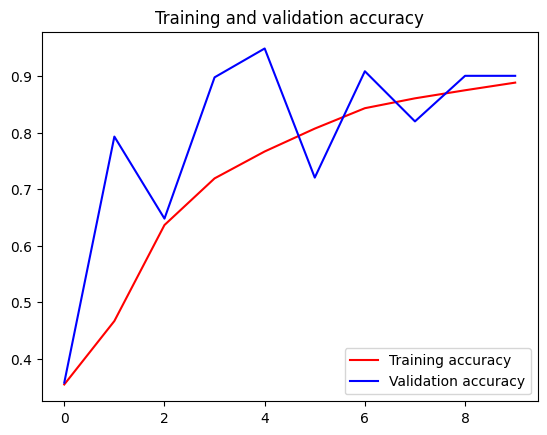

<Figure size 640x480 with 0 Axes>

In [27]:
model2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model2.summary()

model2.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model2.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## 3 convolutions

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_100 (Conv2D)                  │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_93 (MaxPooling2D)      │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_101 (Conv2D)                  │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_94 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_102 (Conv2D)                  │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_95 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 512)                 │       9,470,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,547,651 (36.42 MB)

 Trainable params: 9,547,651 (36.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 297ms/step - accuracy: 0.3305 - loss: 1.9444 - val_accuracy: 0.4839 - val_loss: 0.8933
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 246ms/step - accuracy: 0.4801 - loss: 1.0243 - val_accuracy: 0.6747 - val_loss: 0.6717
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 256ms/step - accuracy: 0.6846 - loss: 0.6878 - val_accuracy: 0.9597 - val_loss: 0.2391
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 247ms/step - accuracy: 0.7810 - loss: 0.5513 - val_accuracy: 0.9355 - val_loss: 0.2486
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 263ms/step - accuracy: 0.8509 - loss: 0.4246 - val_accuracy: 0.9516 - val_loss: 0.1932
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 266ms/step - accuracy: 0.8797 - loss: 0.3038 - val_accuracy: 0.9839 - val_loss: 0.0796
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 260ms/step - accuracy: 0.9035 - loss: 0.2420 - val_accuracy: 0.9543 - val_loss: 0.0972
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 250ms/step - accuracy: 0.9155 - loss: 0.2293 - val_accu

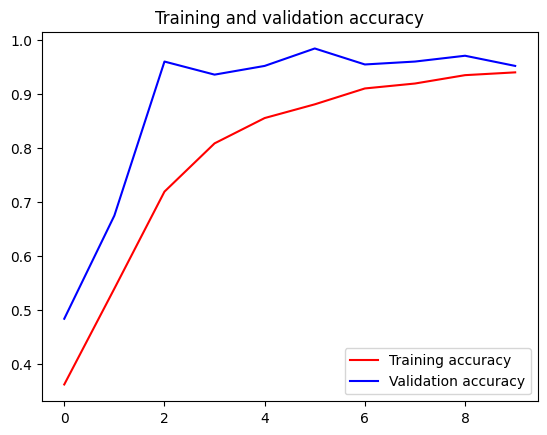

<Figure size 640x480 with 0 Axes>

In [28]:
model4 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model4.summary()

model4.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model4.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## Conclusions
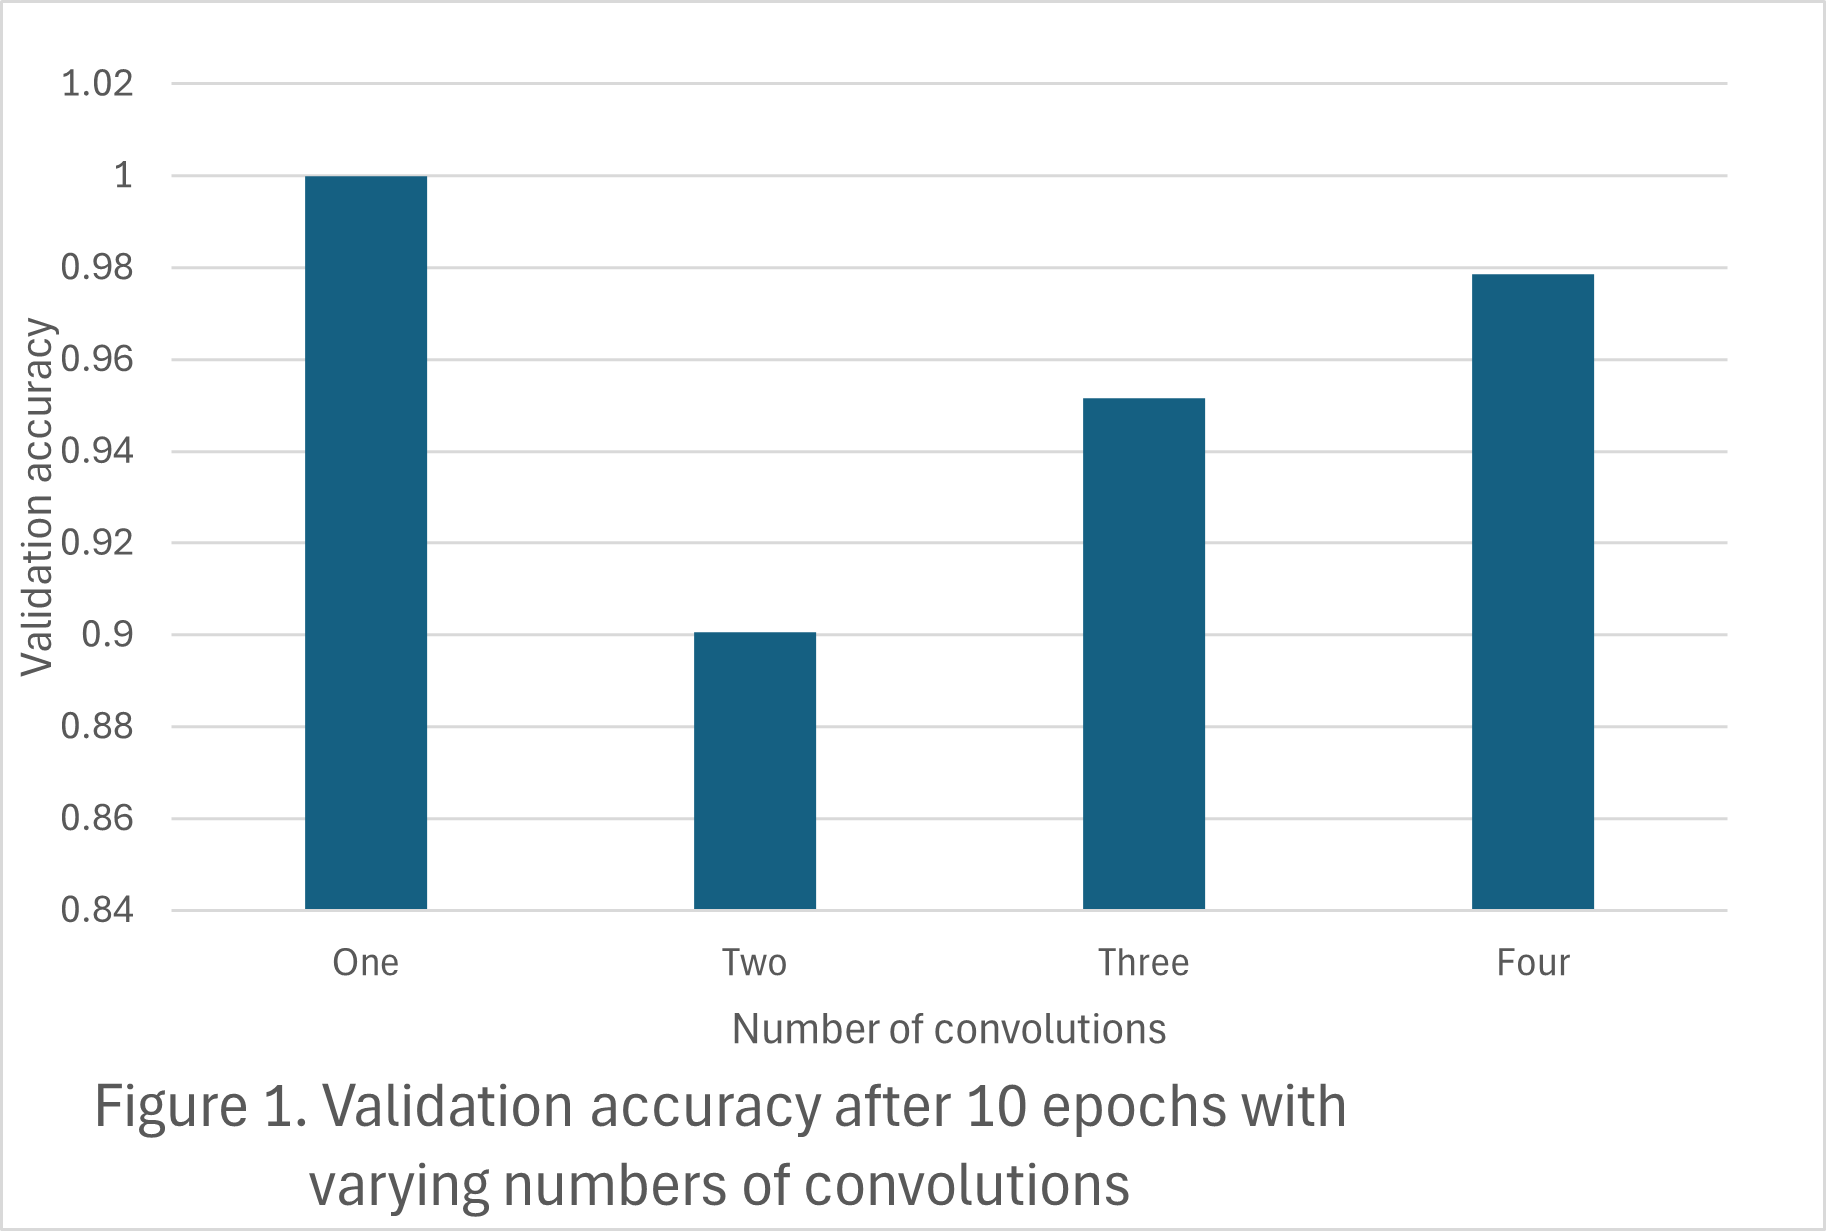
<br>
Validation accuracy peaked with one convolution, then dropped to about 90% when increased to two, and steadily increased as the number of layers was increased. The number of trainable parameters also peaked at 1 convolution and steadily decreased as the number of convolutions was increased. Romanuke claims that the appropriate number of convultions for simpler datasets is likely four, so this result is highly interesting (2018). This is probably due to the pooling layers, which reduce the dimensionality of features (Gholamalinezhad & Khosravi, 2020).

# Changing the number of neurons (one convolution)

## Doubling neurons relative to one convolution case


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_103 (Conv2D)                  │ (None, 148, 148, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_96 (MaxPooling2D)      │ (None, 74, 74, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 700928)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 700928)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 512)                 │     358,875,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 358,880,771 (1.34 GB)

 Trainable params: 358,880,771 (1.34 GB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 371ms/step - accuracy: 0.3404 - loss: 48.0042 - val_accuracy: 0.5215 - val_loss: 1.0077
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 281ms/step - accuracy: 0.4677 - loss: 1.0914 - val_accuracy: 0.5672 - val_loss: 0.8251
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 268ms/step - accuracy: 0.4887 - loss: 1.0738 - val_accuracy: 0.6048 - val_loss: 0.7928
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 279ms/step - accuracy: 0.5165 - loss: 1.0321 - val_accuracy: 0.6505 - val_loss: 0.7369
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 271ms/step - accuracy: 0.6118 - loss: 0.9287 - val_accuracy: 0.8468 - val_loss: 0.5442
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 284ms/step - accuracy: 0.5996 - loss: 0.8774 - val_accuracy: 0.8118 - val_loss: 0.5272
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 273ms/step - accuracy: 0.6405 - loss: 0.8231 - val_accuracy: 0.6129 - val_loss: 0.7912
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 275ms/step - accuracy: 0.6912 - loss: 0.7879 - val_acc

<Figure size 640x480 with 0 Axes>

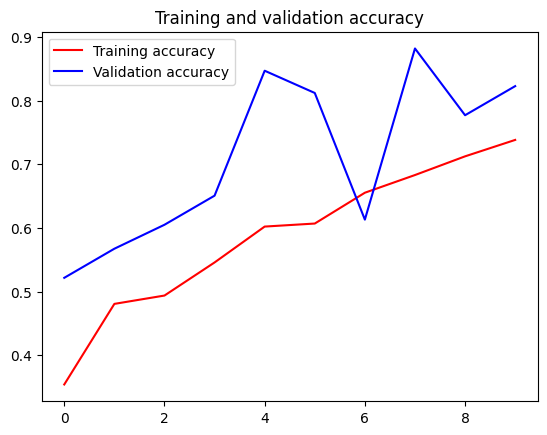

<Figure size 640x480 with 0 Axes>

In [29]:
model5 = tf.keras.models.Sequential()
model5.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)))
model5.add(tf.keras.layers.MaxPooling2D(2, 2))
# Flatten the results to feed into a DNN
model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dropout(0.5))
# 512 neuron hidden layer
model5.add(tf.keras.layers.Dense(512, activation='relu'))
model5.add(tf.keras.layers.Dense(3, activation='softmax'))
model5.summary()

model5.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model5.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 256)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1401856)           0         
                                                                 
 dropout (Dropout)           (None, 1401856)           0         
                                                                 
 dense (Dense)               (None, 512)               717750784 
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                        

<Figure size 640x480 with 0 Axes>

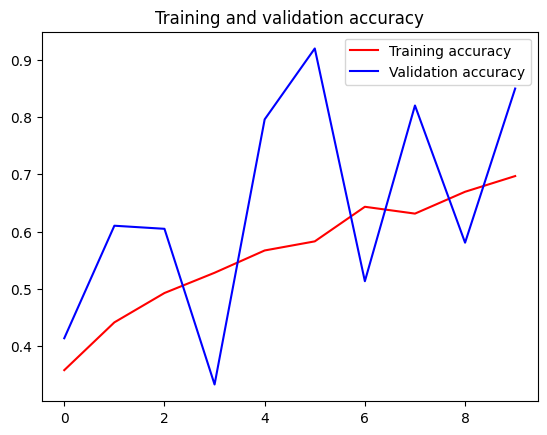

<Figure size 640x480 with 0 Axes>

In [5]:
model6 = tf.keras.models.Sequential()
model6.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=(150, 150, 3)))
model6.add(tf.keras.layers.MaxPooling2D(2, 2))
# Flatten the results to feed into a DNN
model6.add(tf.keras.layers.Flatten())
model6.add(tf.keras.layers.Dropout(0.5))
# 512 neuron hidden layer
model6.add(tf.keras.layers.Dense(512, activation='relu'))
model6.add(tf.keras.layers.Dense(3, activation='softmax'))
model6.summary()

model6.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model6.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

## Conclusions
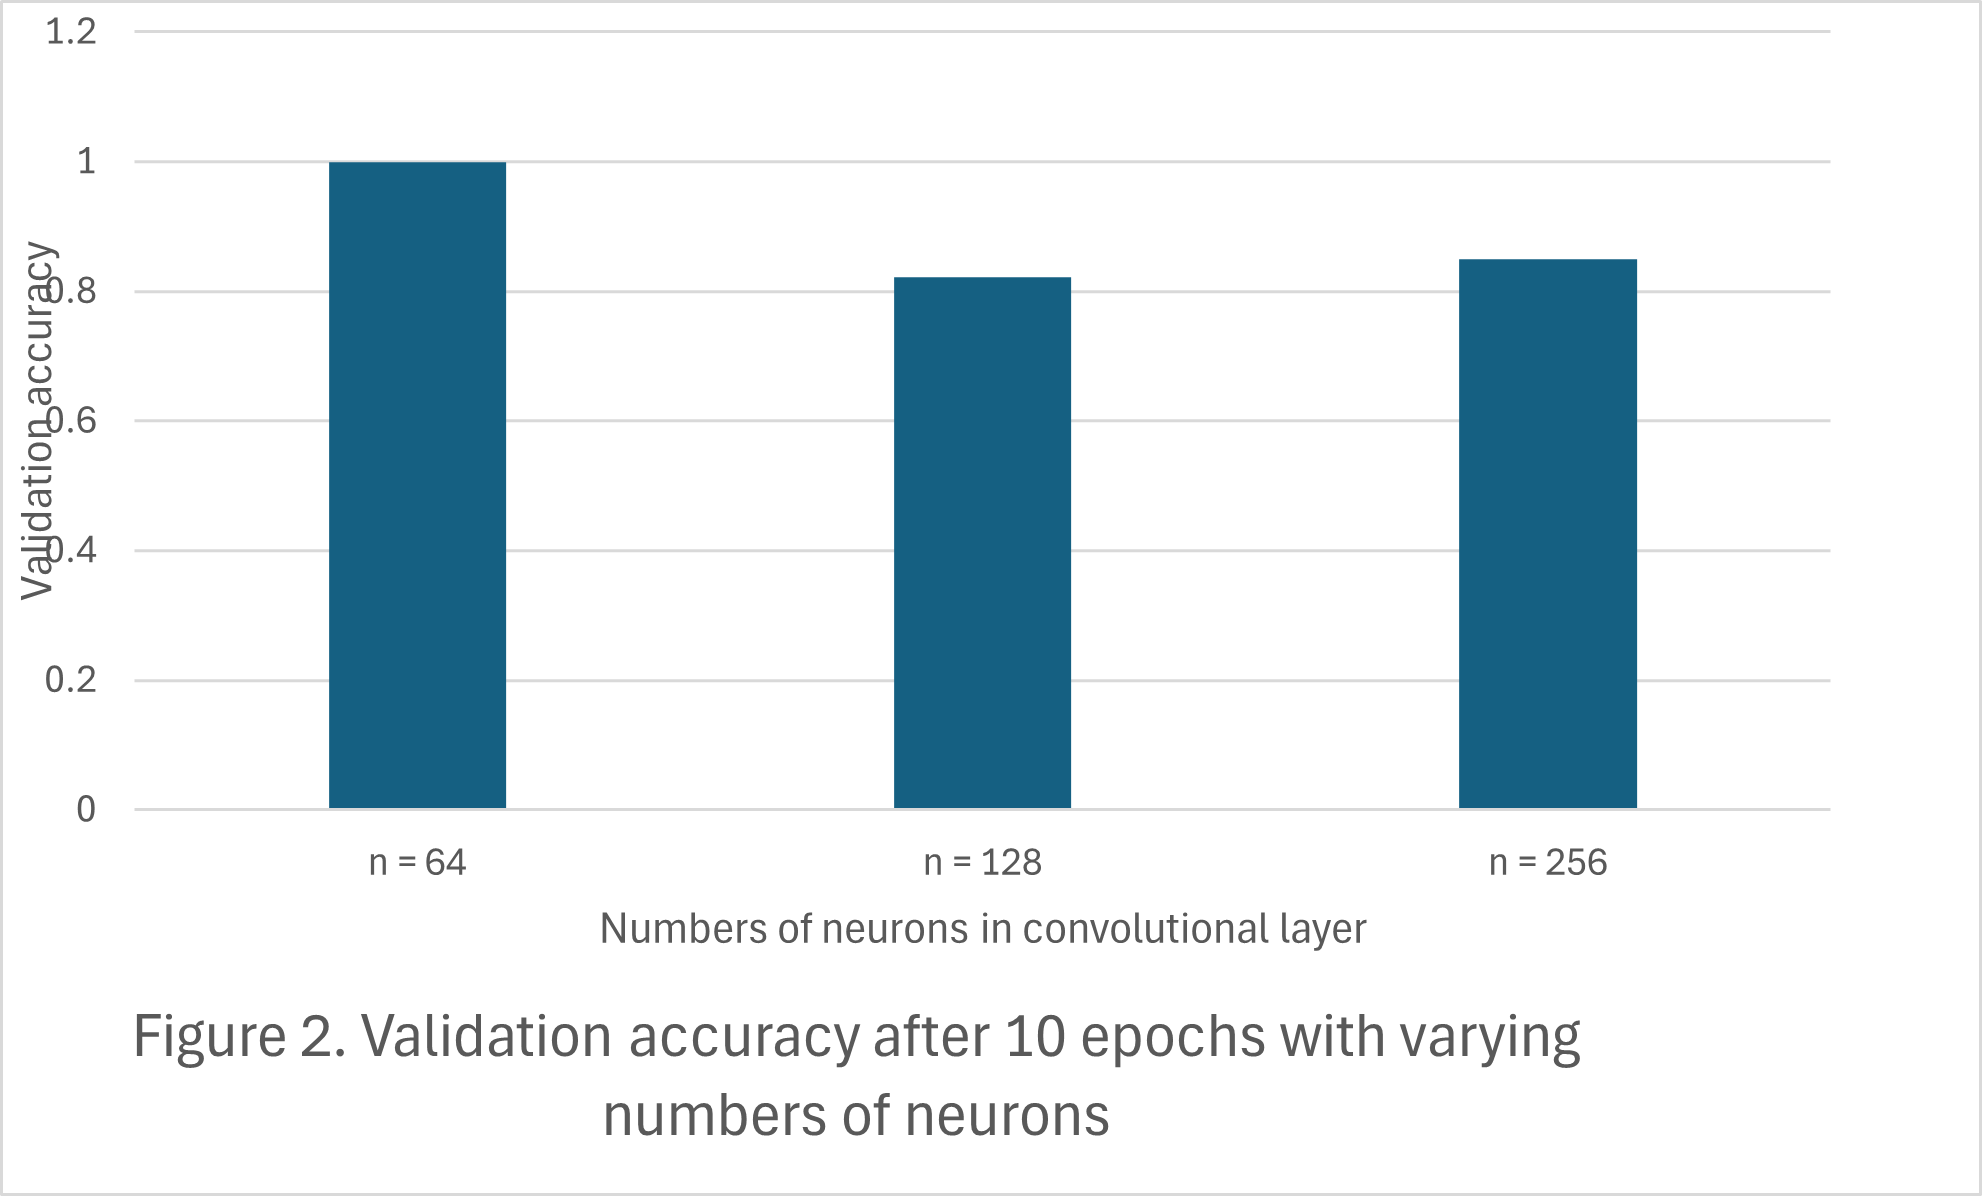
<br>
Steadily doubling the number of neurons did produce some decreases in validation accuracy compared to the 64 neuron - one convolutional model. Some of these effects might be due to overfitting. While dropout would combat this issue, there are other approaches in the literature to combat this problem. Some suggest that pruning of neurons can actually occur prior to training without impacting statistical results and other metrics (Marrone et al., 2020). Additionally, the amount of resources necessary to actually train these models increased to the point of requiring TPU resources, and training the 256 neuron model took close to 20 minutes at this runtime.

# Activation functions

## Sigmoid

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 17, 17, 128)      

<Figure size 640x480 with 0 Axes>

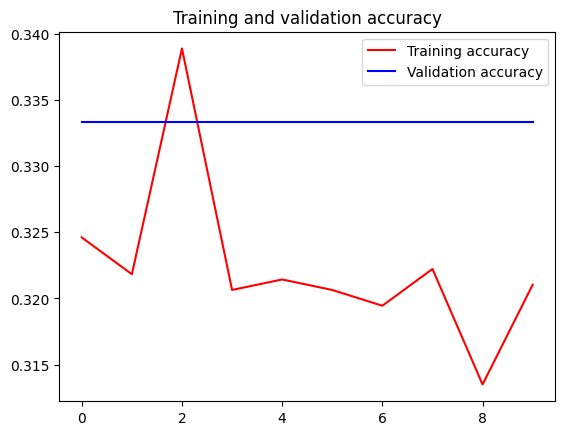

<Figure size 640x480 with 0 Axes>

In [16]:
model1 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='sigmoid', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model1.summary()

model1.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model1.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

## Tanh

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 17, 17, 128)      

<Figure size 640x480 with 0 Axes>

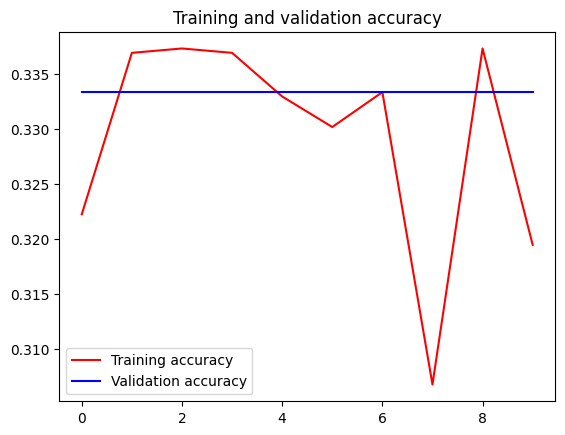

<Figure size 640x480 with 0 Axes>

In [17]:
model1 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='tanh', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='tanh'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='tanh'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='tanh'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model1.summary()

model1.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model1.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

## Softplus

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 17, 17, 128)      

<Figure size 640x480 with 0 Axes>

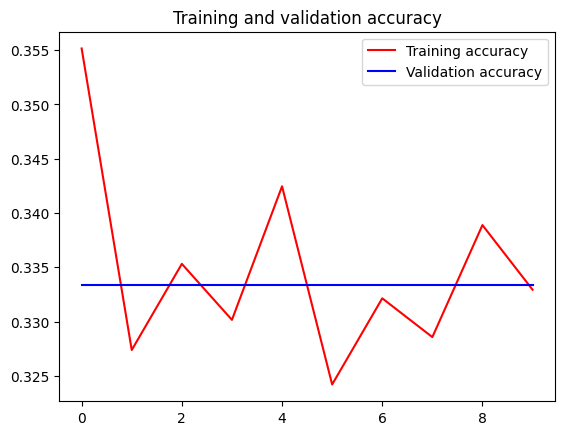

<Figure size 640x480 with 0 Axes>

In [15]:
model1 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='softplus', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='softplus'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='softplus'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='softplus'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model1.summary()

model1.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model1.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 215s 3s/step - accuracy: 0.3473 - loss: 20.5339 - val_accuracy: 0.3952 - val_loss: 1.0978
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.3505 - loss: 1.2054 - val_accuracy: 0.3333 - val_loss: 1.0917
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.3513 - loss: 1.1310 - val_accuracy: 0.4489 - val_loss: 1.0857
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.3862 - loss: 1.2409 - val_accuracy: 0.4758 - val_loss: 1.0685
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.4014 - loss: 1.5802 - val_accuracy: 0.6102 - val_loss: 0.8336
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.4605 - loss: 1.8756 - val_accuracy: 0.6989 - val_loss: 0.7370
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.5368 - loss: 2.1319 - val_accuracy: 0.8011 - val_loss: 0.5406
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.5995 - loss: 0.9473 - val_accuracy: 0.8656 - val_loss: 0

<Figure size 640x480 with 0 Axes>

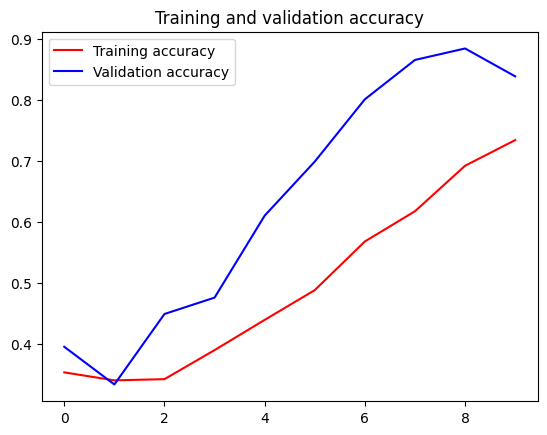

<Figure size 640x480 with 0 Axes>

In [7]:
model1 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='linear', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='linear'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='linear'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='linear'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model1.summary()

model1.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model1.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

The following four different activation functions were examined here: sigmoid, tanh, softplus, and linear. The first three were chosen due to their identification as activation functions that might perform well in classification tasks (Zheng et al., 2020). Interestingly, they all performed with 33% validation accuracy, indicating random guessing, while the linear example performed at 84% after 10 epochs. This may be due to some of these functions applying better to binary classification problems rather than multi-class classification problems (Zheng et al., 2020).

# References
Marrone, S., Papa, C., & Sansone, C. (2021). Effects of hidden layer sizing on CNN fine-tuning. Future Generation Computer Systems, 118, 48-55.<br><br>
Moroney, Laurence. (2021). AI and machine learning for coders. O’Reilly Media.<br><br>
Romanuke, V. V. (2018). An attempt of finding an appropriate number of convolutional layers in CNNs based on benchmarks of heterogeneous datasets. Electrical, Control and Communication Engineering, 14(1), 51-57.<br><br>
Gholamalinezhad, H., & Khosravi, H. (2020). Pooling methods in deep neural networks, a review. arXiv preprint arXiv:2009.07485.<br><br>
Zheng, Q., Yang, M., Tian, X., Wang, X., & Wang, D. (2020). Rethinking the Role of Activation Functions in Deep Convolutional Neural Networks for Image Classification. engineering letters, 28(1).